<a href="https://colab.research.google.com/github/AYUSH-11/Machine-Learning/blob/main/Crop_Recommendation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#All mathematical operation are done by numpy
import numpy as np
#It is used for ploting 
import matplotlib.pyplot as plt
# for read all files
import pandas as pd

import random
import math
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, auc, roc_curve 
import seaborn as sns   # For Correlation 

from sklearn.neighbors import KNeighborsClassifier

from sklearn.ensemble import RandomForestClassifier

from sklearn.cluster import KMeans

import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors

In [2]:
from google.colab import drive  #to import Google drive data
drive.mount('/content/drive') #to the drive data into colab cloud and enter the activation colab 

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
cd /content/drive/"My Drive/Colab Notebooks/Linear Regression"

/content/drive/My Drive/Colab Notebooks/Linear Regression


In [4]:
dataset = pd.read_csv('Crop_recommendation.csv')

In [5]:
dataset.shape

(2200, 9)

In [6]:
dataset.describe()

,N,P,K,temperature,humidity,ph,rainfall,label_numeric
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655,10.500000
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389,6.345731
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267,0.000000
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686,5.000000
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624,10.500000
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508,16.000000
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117,21.000000


In [7]:
corr = dataset.corr()
print(corr)


                      N         P         K  ...        ph  rainfall  label_numeric
N              1.000000 -0.231460 -0.140512  ...  0.096683  0.059020       0.282787
P             -0.231460  1.000000  0.736232  ... -0.138019 -0.063839      -0.167951
K             -0.140512  0.736232  1.000000  ... -0.169503 -0.053461       0.143703
temperature    0.026504 -0.127541 -0.160387  ... -0.017795 -0.030084       0.180571
humidity       0.190688 -0.118734  0.190859  ... -0.008483  0.094423       0.524452
ph             0.096683 -0.138019 -0.169503  ...  1.000000 -0.109069       0.052389
rainfall       0.059020 -0.063839 -0.053461  ... -0.109069  1.000000       0.121486
label_numeric  0.282787 -0.167951  0.143703  ...  0.052389  0.121486       1.000000

[8 rows x 8 columns]


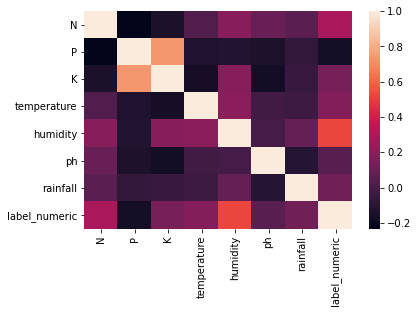

In [8]:
sns.heatmap(corr)

In [9]:
#Shuffle DataFrame rows
dataset =dataset.sample(frac=1)

In [10]:
# split data into two parts training and testing 
train_set = dataset.sample(frac=0.80,random_state=0)
test_set = dataset.drop(train_set.index)

In [11]:
print(train_set.shape)
print(test_set.shape)

(1760, 9)
(440, 9)


In [12]:
#bifurgate in feature and target
train_set_feature = np.column_stack((train_set.iloc[:,0:1].values,train_set.iloc[:,4:5].values,train_set.iloc[:,2:3].values))
train_set_target = train_set.iloc[:,-2:-1].values
test_set_feature = np.column_stack((test_set.iloc[:,0:1].values,test_set.iloc[:,4:5].values,test_set.iloc[:,2:3].values))
test_set_target = test_set.iloc[:,-2:-1].values

data_feature = np.column_stack((dataset.iloc[:,0:1].values,dataset.iloc[:,4:5].values,dataset.iloc[:,2:3].values))
data_target = dataset.iloc[:,-2:-1].values

In [13]:
# It will give precision,recall,f1-score,support for each class
#macro average : averaging the unweighted mean per label
#weighted average : averaging the support-weighted mean per label
def make_report(y_actual,y_pred):
    confusionMatrix=confusion_matrix(y_actual, y_pred, labels=[i for i in range(22)])
    report = classification_report(y_actual, y_pred)
    print(report)
    

In [14]:
print(train_set_feature.shape)
print(train_set_target.shape)
print(test_set_feature.shape)
print(test_set_target.shape)


(1760, 3)
(1760, 1)
(440, 3)
(440, 1)


In [15]:
train_set_target = train_set_target.reshape(1760,)

# K -Nearest Neighbors

In [16]:
#Find Eucledian Distance Between point-1 and point-2
def eucledian_distance(p1,p2):
    distance = (p1-p2)**2
    distance =np. sum(distance)
    return  math.sqrt(distance)

In [17]:
model = KNeighborsClassifier(n_neighbors=3,weights='uniform')
model.fit(train_set_feature,train_set_target)
prediction = model.predict(test_set_feature)
score = model.score(test_set_feature, test_set_target) * 100
print(score)

85.0


In [18]:
make_report(test_set_target,prediction)

              precision    recall  f1-score   support

           0       0.44      0.85      0.58        13
           1       0.93      0.96      0.95        27
           2       1.00      1.00      1.00        15
           3       1.00      1.00      1.00        19
           4       0.45      0.53      0.49        17
           5       0.59      0.50      0.54        20
           6       1.00      1.00      1.00        18
           7       0.86      0.63      0.73        19
           8       0.55      0.73      0.63        15
           9       1.00      0.95      0.98        22
          10       0.75      0.71      0.73        21
          11       1.00      0.96      0.98        23
          12       1.00      1.00      1.00        14
          13       0.56      0.39      0.46        23
          14       0.80      0.96      0.87        25
          15       1.00      1.00      1.00        19
          16       1.00      1.00      1.00        22
          17       0.95    

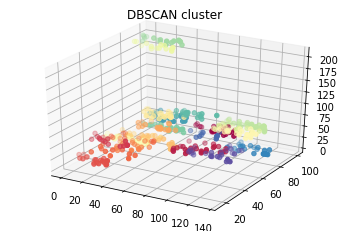

In [19]:
fig = plt.figure()
ax = plt.axes(projection ='3d')
unique_labels = set(prediction)
colors=[plt.cm.Spectral(i) for i in np.linspace(0,1,len(unique_labels))]
#R/255 , G/255 , B/255 , opacity
for k,col in zip(unique_labels,colors):

        
    x = test_set_feature[prediction==k,0]    #N          0-140
    y = test_set_feature[prediction==k,1]    #humidity   0-100   
    z = test_set_feature[prediction==k,2]    #k          0-200
    ax.scatter(x,y,z,color=col)
plt.title("DBSCAN cluster")

plt.show()


# Random Forest

In [20]:
model = RandomForestClassifier(n_estimators=1000,random_state=0)
model.fit(train_set_feature,train_set_target)
prediction = model.predict(test_set_feature)

print(model.score(test_set_feature, test_set_target) * 100)

87.95454545454545


In [21]:
make_report(test_set_target,prediction)

              precision    recall  f1-score   support

           0       0.69      0.85      0.76        13
           1       0.96      1.00      0.98        27
           2       1.00      1.00      1.00        15
           3       1.00      1.00      1.00        19
           4       0.57      0.47      0.52        17
           5       0.50      0.45      0.47        20
           6       1.00      1.00      1.00        18
           7       0.79      0.58      0.67        19
           8       0.58      0.93      0.72        15
           9       0.95      0.95      0.95        22
          10       0.62      0.76      0.68        21
          11       0.96      1.00      0.98        23
          12       1.00      1.00      1.00        14
          13       0.78      0.61      0.68        23
          14       0.96      1.00      0.98        25
          15       1.00      1.00      1.00        19
          16       1.00      1.00      1.00        22
          17       0.95    

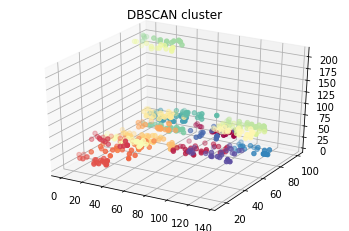

In [22]:
fig = plt.figure()
ax = plt.axes(projection ='3d')
unique_labels = set(prediction)
colors=[plt.cm.Spectral(i) for i in np.linspace(0,1,len(unique_labels))]
#R/255 , G/255 , B/255 , opacity
for k,col in zip(unique_labels,colors):

        
    x = test_set_feature[prediction==k,0]    #N          0-140
    y = test_set_feature[prediction==k,1]    #humidity   0-100   
    z = test_set_feature[prediction==k,2]    #k          0-200
    ax.scatter(x,y,z,color=col)
plt.title("DBSCAN cluster")

plt.show()

# KMeans

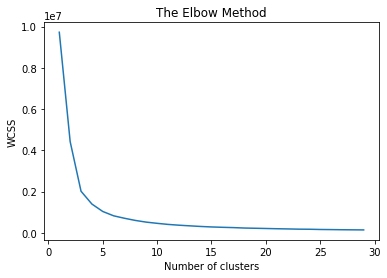

In [23]:
wcss=[]
for i in range(1,30):
    kmeans=KMeans(n_clusters=i,init='k-means++',random_state=0)
    kmeans.fit(data_feature)
    wcss.append(kmeans.inertia_)

plt.plot(range(1,30),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [24]:
kmeans=KMeans(n_clusters=22,init='k-means++',random_state=0)
prediction=kmeans.fit_predict(data_feature)

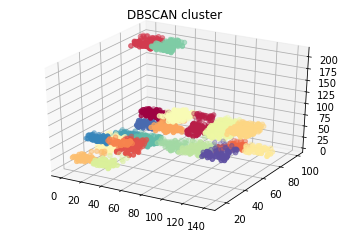

In [25]:
fig = plt.figure()
ax = plt.axes(projection ='3d')
unique_labels = set(prediction)
colors=[plt.cm.Spectral(i) for i in np.linspace(0,1,len(unique_labels))]
#R/255 , G/255 , B/255 , opacity
for k,col in zip(unique_labels,colors):

        
    x = data_feature[prediction==k,0]    #N          0-140
    y = data_feature[prediction==k,1]    #humidity   0-100   
    z = data_feature[prediction==k,2]    #k          0-200
    ax.scatter(x,y,z,color=col)
plt.title("DBSCAN cluster")

plt.show()

# Hierarchical Clustering

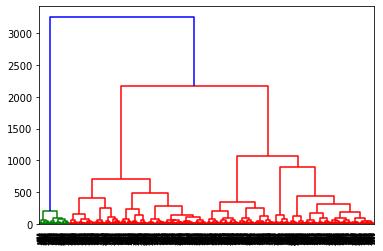

In [26]:
dendogram = sch.dendrogram(sch.linkage(data_feature,method='ward'))

In [27]:
hc = AgglomerativeClustering(n_clusters=22,affinity ='euclidean', linkage = 'ward')
prediction = hc.fit_predict(data_feature)

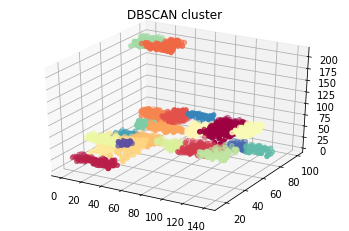

In [28]:
fig = plt.figure()
ax = plt.axes(projection ='3d')
unique_labels = set(prediction)
colors=[plt.cm.Spectral(i) for i in np.linspace(0,1,len(unique_labels))]
#R/255 , G/255 , B/255 , opacity
for k,col in zip(unique_labels,colors):

        
    x = data_feature[prediction==k,0]    #N          0-140
    y = data_feature[prediction==k,1]    #humidity   0-100   
    z = data_feature[prediction==k,2]    #k          0-200
    ax.scatter(x,y,z,color=col)
plt.title("DBSCAN cluster")

plt.show()

# DBSCAN

In [29]:
data_feature_standard = StandardScaler().fit_transform(data_feature)

In [30]:
nearesneighvour=NearestNeighbors(3).fit(data_feature_standard)

In [31]:
distances,indices = nearesneighvour.kneighbors(data_feature_standard)

In [32]:
distanceDec = sorted(distances[:,2],reverse=True)

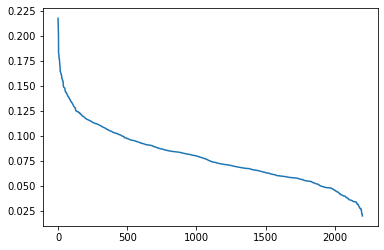

In [33]:
plt.plot(indices[:,0],distanceDec)


In [34]:
db = DBSCAN(eps=0.125,min_samples=3).fit(data_feature_standard)
labels = db.labels_

In [35]:
core_sample_mask=np.zeros_like(db.labels_,dtype=bool)
core_sample_mask[db.core_sample_indices_]=True

In [36]:
core_sample_mask

array([ True,  True,  True, ...,  True,  True,  True])

In [37]:
prediction = db.fit_predict(data_feature_standard)

In [38]:
print(prediction)

[ 0  1  2 ... 16 10  1]


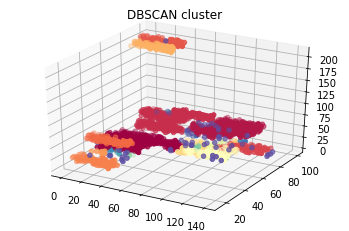

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, -1}


In [39]:
fig = plt.figure()
ax = plt.axes(projection ='3d')
unique_labels = set(prediction)
colors=[plt.cm.Spectral(i) for i in np.linspace(0,1,len(unique_labels))]
#R/255 , G/255 , B/255 , opacity
for k,col in zip(unique_labels,colors):

        
    x = data_feature[prediction==k,0]    #N          0-140
    y = data_feature[prediction==k,1]    #humidity   0-100   
    z = data_feature[prediction==k,2]    #k          0-200
    ax.scatter(x,y,z,color=col)
plt.title("DBSCAN cluster")

plt.show()
print(unique_labels)